In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from routines import ReadCOSMOthermExcess

T = 303.15
param_str = 'TZVP'
hfc_list = ['difluoromethane', '1,1,1,2-tetrafluoroethane', 'pentafluoroethane']
des_list = ['c2mim_hdfs_pfpa[1_2]', 'tba_nfs_pfpa[1_2]', 'tbp_br_pfpa[1_2]']

In [7]:
x1_ndx = 0
x1, HE, GE, HE_mf, HE_hb, HE_vdw, HE_conf = [], [], [], [], [], [], []
for i,des_str in enumerate(des_list):
    HE_aux, GE_aux, HE_mf_aux, HE_hb_aux, HE_vdw_aux, HE_conf_aux = [], [], [], [], [], []
    data_inp = 'excess_properties/'+des_str+'-ExcessProperties-'+param_str+'.tab'
    COSMO = ReadCOSMOthermExcess(data_inp)
    for j,hfc_str in enumerate(hfc_list):
        x1.append(COSMO[(T, hfc_str)][0][x1_ndx])
        HE_aux.append(COSMO[(T, hfc_str)][1][x1_ndx]), GE_aux.append(COSMO[(T, hfc_str)][2][x1_ndx])
        HE_mf_aux.append(COSMO[(T, hfc_str)][3][x1_ndx]), HE_hb_aux.append(COSMO[(T, hfc_str)][4][x1_ndx])
        HE_vdw_aux.append(COSMO[(T, hfc_str)][5][x1_ndx]), HE_conf_aux.append(COSMO[(T, hfc_str)][6][x1_ndx])
    HE.append(HE_aux), GE.append(GE_aux)
    HE_mf.append(HE_mf_aux), HE_hb.append(HE_hb_aux), HE_vdw.append(HE_vdw_aux), HE_conf.append(HE_conf_aux)

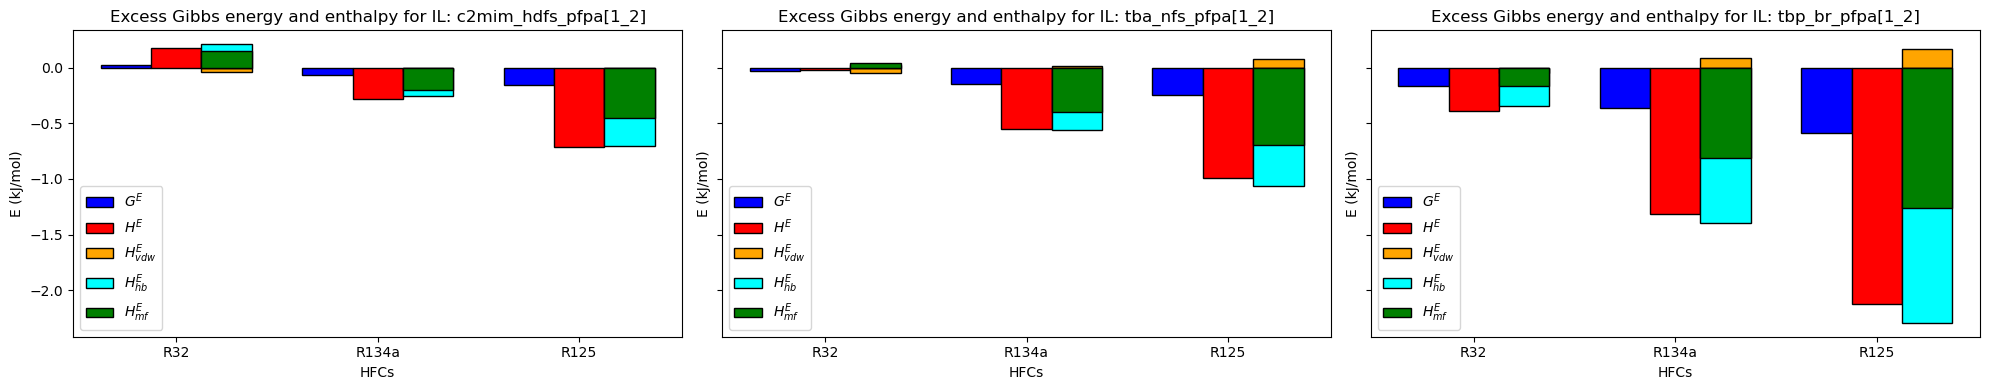

In [8]:
hfc_label = ['R32', 'R134a', 'R125']
fig, axs = plt.subplots(1, 3, figsize=(20, 4), sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(3):
    for j in range(len(hfc_list)):
        axs[i].bar(j*.4, GE[i][j], width=.1, label=des_list[i], color='blue', edgecolor='black')
        axs[i].bar(j*.4+.1, HE[i][j], width=.1, label=des_list[i], color='red', edgecolor='black')
        # plot HE contributions on top of each other
        axs[i].bar(j*.4+.2, HE_vdw[i][j], width=.1, label=des_list[i], color='orange', edgecolor='black')
        axs[i].bar(j*.4+.2, HE_mf[i][j]+HE_hb[i][j], width=.1, label=des_list[i], color='cyan', edgecolor='black')
        axs[i].bar(j*.4+.2, HE_mf[i][j], width=.1, label=des_list[i], color='green', edgecolor='black')
    axs[i].set_xticks(np.arange(len(hfc_list)) * .4 + .1)
    axs[i].set_xticklabels(hfc_label)
    #axs[i].set_ylim(-2, 3)
    axs[i].set_xlabel('HFCs')
    axs[i].set_ylabel('E (kJ/mol)')
    axs[i].set_title('Excess Gibbs energy and enthalpy for IL: ' + des_list[i])
    axs[i].legend([r'$G^E$', r'$H^E$', r'$H^E_{vdw}$', r'$H^E_{hb}$', r'$H^E_{mf}$'], loc='lower left')
plt.tight_layout()
plt.show()

In [9]:
# save data for gnuplot bar plot
for i,il_str in enumerate(des_list):
    data_out = 'excess_properties/'+il_str+'-'+param_str+'.out'
    with open(data_out, 'w') as f:
        f.write('# F-gas\tG^E\tH^E\tH^E_vdw\tH^E_hb\tH^E_mf\n')
        for j,hfc_str in enumerate(hfc_label):
            f.write(f'{hfc_str}\t{GE[i][j]:.3f}\t{HE[i][j]:.3f}\t{HE_vdw[i][j]:.3f}\t{HE_hb[i][j]:.3f}\t{HE_mf[i][j]:.3f}\n')